In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [23]:
nav_df = pd.read_csv('../.tmp/navigation_df.csv', index_col= 0)
rocks_df = pd.read_csv('../.tmp/rocks_df.csv', index_col = 0)
obs_map = pd.read_csv('../.tmp/obs_map.csv', index_col =0)
obs_map = obs_map > 0
obs_df = pd.read_csv('../.tmp/obs_df.csv', index_col = 0)

(0, 2)
Empty DataFrame
Columns: [angles, distance]
Index: []
(6636, 2)
     angles    distance
0  0.631691  152.410630
1  0.630257  151.013244
2  0.624886  150.426062
3  0.619474  149.843251
4  0.628796  149.616176
     angles    distance
0  0.785398  226.274170
1  0.782263  225.568172
2  0.779109  224.864404
3  0.775935  224.162887
4  0.772741  223.463644


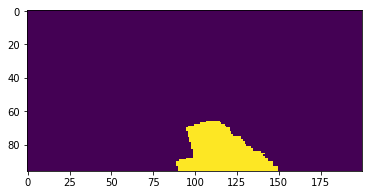

In [24]:
print(rocks_df.shape)
print(rocks_df.head())
print(nav_df.shape)
print(nav_df.head())
print(obs_df.head())
plt.imshow(obs_map.values)
plt.show()

In [26]:
print(nav_df.describe())

            angles     distance
count  6636.000000  6636.000000
mean      0.148583    71.906144
std       0.358332    29.793519
min      -0.708626     5.000000
25%      -0.124355    50.328918
50%       0.213287    71.794846
75%       0.463648    93.001344
max       0.708626   152.410630


In [25]:
print(obs_df.describe())

             angles      distance
count  44564.000000  44564.000000
mean      -0.018070    130.328171
std        0.936304     42.577732
min       -1.564507      1.000000
25%       -0.847817    103.484298
50%       -0.120529    135.793962
75%        0.854084    160.031247
max        1.564546    226.274170


In [84]:
"""Find the normal at a range of rover yaw angles"""
yaws = []
distances = []
headings = range(-5,65,5)
for phi in headings:
    phi = np.deg2rad(phi)

    
    ar = np.min(obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)].distance)
    a = np.min(obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)].angles)
    br = np.max(obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)].distance)
    b = np.max(obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)].angles)
    
    max_threshold = 100
    if (ar > max_threshold) & (br > max_threshold) :
        normal = 0 
    else :
        ax, ay = np.sin(a)*ar, np.cos(a)*ar
        bx, by = np.sin(b)*br, np.cos(b)*br

        normal = ((bx - ax) / (ay - by))
#     print('tangent angle: {}'.format(theta))
    yaw = normal + (np.pi/2)
    yaws.append(yaw)
    distances.append(np.mean([ar,br]))
    
print('mean yaw angle: {}'.format(np.mean(yaws)))
print('weighted mean yaw angle: {}'.format(np.average(yaws, weights=[1/d for d in distances])))
print('weighted by heading yaw angle: {}'.format(np.average(yaws, weights = [phi - np.abs(h) for h in headings]/phi)))
    

mean yaw angle: 1.1118360417428232
weighted mean yaw angle: 1.0418502752169743
weighted by heading yaw angle: 0.7246101541213905
